In [1]:
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape) # (60000, 784)
print (x_test.shape) # (10000, 784)


/Users/user/opt/anaconda3/envs/jklee/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.24.3) or chardet (5.0.0)/charset_normalizer (2.0.0) doesn't match a supported version!
  warnings.warn(


(60000, 784)
(10000, 784)


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

model = KMeans(init= "k-means++", n_clusters=10, random_state=0)
model.fit(x_train)
y_pred = model.labels_

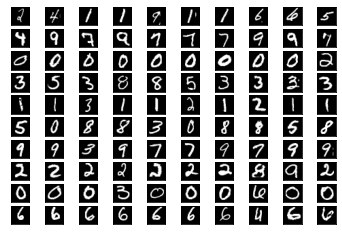

In [3]:
import matplotlib.pyplot as plt

def viz_img(y_pred):
    n = 10
    fig = plt.figure(1)
    box_index = 1
    for cluster in range(10):
        result = np.where(y_pred == cluster)
        for i in np.random.choice(result[0].tolist(), n, replace=False):
            ax = fig.add_subplot(n, n, box_index)
            plt.imshow(x_train[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            box_index += 1
    plt.show()

viz_img(y_pred)

In [4]:
# from spherecluster import SphericalKMeans

# skm = SphericalKMeans(n_clusters=10)
# skm.fit(x_train)

# viz_img(skm.labels_)

ModuleNotFoundError: No module named 'spherecluster'

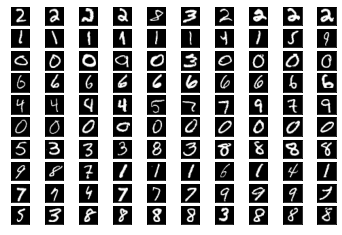

In [5]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=30).fit(x_train)
reduced_X = pca.transform(x_train)

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(reduced_X)
y_pred = model.labels_

viz_img(y_pred)

In [7]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=300)
transformed = model.fit_transform(x_train)


/Users/user/opt/anaconda3/envs/jklee/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [8]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=2.4, min_samples=100)
predict = model.fit(transformed)
y_pred = predict.labels_

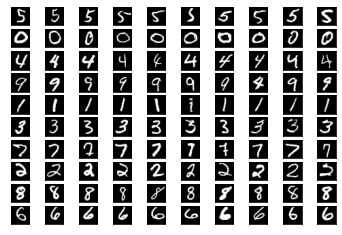

In [9]:
import pandas as pd
# Assign result to df
dataset = pd.DataFrame({'Column1':transformed[:,0],'Column2':transformed[:,1]})
dataset['cluster_num'] = pd.Series(predict.labels_)

viz_img(y_pred)